# Assignment-03 First Step of Machine Learning: Model and Evaluation

# Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 
##### What's the *model*? 
1. 本质上是一个函数，实现从样本x到标签y的映射
2. 解决问题的一种人为构造的方法，不同类型的问题可以定义不同的模型
3. 一般基于假设的前提，然后通过数据不断更新参数
* 参考网址: <https://www.zhihu.com/question/285520177>

##### why  all the models are wrong, but some are useful?
1. 此话来自于George E. P. Box
2. 受影响的features很多，但是往往我们考虑的点都很片面
3. 唯一正确的模型是现实本身
* 参考网址：<https://www.zhihu.com/question/35786261>

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

*过拟合：*特征纬度过多，或者模型过于复杂，训练迭代次数过多，导致的模型过度学习，拟合的函数完美的经过训练集，但是对新数据的预测结果则较差。
*欠拟合：*特征纬度过少，或者模型训练次数太少，导致模型没有很好的学习，模型泛化效果不好，拟合的函数无法满足训练集，误差较大。

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:
```
真正例（True Positive，TP）：真实类别为正例，预测类别为正例。
假正例（False Positive，FP）：真实类别为负例，预测类别为正例。
假负例（False Negative，FN）：真实类别为正例，预测类别为负例。
真负例（True Negative，TN）：真实类别为负例，预测类别为负例。
```
**precision:** 预测正确的正例数据占预测为正例数据的比例, 看重预测正样本预测的准确度
$$ P=\frac{TP}{TP+FP}$$ 

**recall:** 预测为正例的数据占实际为正例数据的比例, 看重真实为正样本被正确预测的比例

$$ R=\frac{TP}{TP+FN} $$  
**AUC:** Area Under roc Curve，就是ROC曲线的积分，也是ROC曲线下面的面积。一般用于分类问题的评估。


**F1:** F1的核心思想在于，在尽可能地提高精确度(Precision)和召回率(Recall)的同时，也希望两者之间的差异尽可能的小。

$$ F1 = \frac{2*precision*recall}{precision + recall} $$



**Fi:**
    $$ F_i = (1+i)^2 * \frac{P*R}{i^2*P + R} $$

* 参考网址：<https://www.zhihu.com/question/30643044>

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

1. 机器学习，是让机器学会人的思维，给其数据、特征，让机器学会人“识别事物的方法”。
2. 机器学习就是模仿人识别事物的过程，即：学习、提取特征、识别、分类。
3. 不同于分析式编程，传统的分析式编程，是对数据进行编程，人为的选取合适的模型方法，进行编程。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

我觉得正确。针对不同的问题，有对应的衡量评价指标，选择正确合适的评估指标，有利于对于结果的观察，评估，从而做进一步改进优化。如果选取的不对，可能会导致后续评估观察等产生问题，不利于做进一步的改进

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

# Part-03 Programming Practice 编程练习

### 1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [35]:
import pandas as pd

In [36]:
from icecream import ic

In [37]:
import numpy as np

In [38]:
from collections import Counter

In [39]:
def entropy(elements_list):
    length = len(elements_list)
    counter = Counter(elements_list)
    probs = [counter[c] / length for c in set(elements_list)]
#     print(probs)
    ic(probs)
    # 不写底数时默认以e为底
    return -sum(p * np.log(p) for p in probs)

In [52]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)

In [53]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [57]:
def find_optimal_spilter(train_data: pd.DataFrame, target: str) -> str:
    # set(train_data.columns.tolist()): {'family_number', 'income', 'gender', 'bought'}
    x_fields = set(train_data.columns.tolist()) - {target}
#     print(x_fields)
    spliter = None
    min_entropy = float('inf')
    for f in x_fields:
        """
            values:
                {'M', 'F'}
                {1, 2}
                {'-10', '+10'}
                {0, 1}
        """
        values = set(train_data[f])
        print(values)
        for v in values:
            sub_spliter_1 = train_data[train_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            
            sub_spliter_2 = train_data[train_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))    
    return spliter, min_entropy             

In [58]:
# 反复调用find_optimal_spilter， 获取整个完整决策树，存放进dict中
def get_tree(train_data: pd.DataFrame, target: str):
    tree = {}
    while True:
        # 寻找最优划分
        (k, v), min_entropy = find_optimal_spilter(train_data=train_data, target=target)
        tree[k] = v
        if min_entropy == 0:
            break
        # 获取下一数据表
        train_data = train_data[train_data[k] != v]
        print(train_data)
        train_data = train_data.drop([k],axis=1)
        # 直到为0
        if len(train_data.columns) == 1:
            break
        if train_data.shape[0] == 0:
            break     
    i = 0
    print("划分如下：")
    for k,v in tree.items():
        i += 1
        print("第(%d)次，为(%s)" %(i,(k,v)))    
    return tree        

In [60]:
decision_tree = get_tree(train_data=dataset, target='bought')

ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic

{1, 2}


| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 1, 0]


{'-10', '+10'}
{'F', 'M'}


ic| probs: [0.25, 0.75]
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]


spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565
  gender income  family_number  bought
1      F    -10              1       1
6      M    -10              2       1
{1, 2}
{'F', 'M'}


ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0


spliter is: ('gender', 'M')
the min entropy is: -0.0
划分如下：
第(1)次，为(('income', '+10'))
第(2)次，为(('gender', 'M'))


In [76]:
def predicate(gender, income, family_number):
    decisiontree = get_tree(train_data=dataset, target='bought')
    bought = 0
    data_list = [gender, income, family_number]
#     data_list.append(gender)

    for k in decisiontree:
        print(k)
        if decisiontree[k] in data_list:
            bought = 1
            break
    if bought == 0:
        print(str(data_list), "会购买, bought==0")
    else:
        print(str(data_list), "不会购买, bought==1")

    return bought

In [77]:
predicate('M', '-10', 1)

ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]

{1, 2}
{'-10', '+10'}



ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2

{'F', 'M'}
spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565
  gender income  family_number  bought
1      F    -10              1       1
6      M    -10              2       1
{1, 2}


: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0


{'F', 'M'}
spliter is: ('gender', 'M')
the min entropy is: -0.0
划分如下：
第(1)次，为(('income', '+10'))
第(2)次，为(('gender', 'M'))
income
gender
['M', '-10', 1] 不会购买, bought==1


1

In [78]:
predicate('M', '+10', 1)

ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565


{1, 2}
{'-10', '+10'}


ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1]
ic| probs: [1.0]


{'F', 'M'}
spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565
  gender income  family_number  bought
1      F    -10              1       1
6      M    -10              2       1
{1, 2}


ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0


{'F', 'M'}
spliter is: ('gender', 'M')
the min entropy is: -0.0
划分如下：
第(1)次，为(('income', '+10'))
第(2)次，为(('gender', 'M'))
income
['M', '+10', 1] 不会购买, bought==1


1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

### 2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

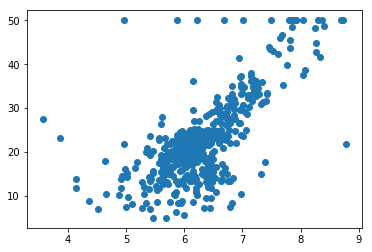

In [82]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5] # 为了方便，取用了前5个特征值
# plot the RM with respect to y
plt.scatter(X_rm,y)

In [83]:
# 定义目标函数
def price(rm, k, b):
    return k * rm + b

$$ loss = \frac{1}{n} \sum{|(y_i - \hat{y_i})|}$$

$$ loss = \frac{1}{n} \sum{|(y_i - (kx_i+b_i))|}$$

In [148]:
# 损失函数改为绝对值
# 定义损失函数
def loss(y, y_hat):
    n = len(y)
    loss_ = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        
        if y_i >= y_hat_i:
            loss_ += (y_i - y_hat_i)
        else:
            loss_ += (y_hat_i - y_i) 
    print("loss_ /n", loss_ /n)
    return loss_ /n

In [149]:
# 求解关于k的偏导数
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1 * x_i
        else :
            gradient += 1 * x_i
    return 1/n * gradient

In [150]:
# 求解关于b的偏导数
def partial_derivative_b(y, y_hat): 
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1
        else :
            gradient += 1
    return 1 / n * gradient

In [151]:
# 参数初始化
k = random.random() * 200 - 100 
b = random.random() * 200 - 100
learning_rate = 1e-3
iteration_num = 200
losses = []
for i in range(iteration_num):
    price_use_current_parameters = [price(r, k, b) for r in X_rm]
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i, current_loss, k, b))
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

loss_ /n 421.9467509435635
Iteration 0, the loss is 421.9467509435635, parameters k is 61.51157215025401 and b is 57.90181571211795
loss_ /n 421.9062543141808
Iteration 1, the loss is 421.9062543141808, parameters k is 61.50528751586666 and b is 57.900815712117954
loss_ /n 421.86575768479844
Iteration 2, the loss is 421.86575768479844, parameters k is 61.49900288147931 and b is 57.899815712117956
loss_ /n 421.8252610554156
Iteration 3, the loss is 421.8252610554156, parameters k is 61.492718247091965 and b is 57.89881571211796
loss_ /n 421.78476442603295
Iteration 4, the loss is 421.78476442603295, parameters k is 61.486433612704616 and b is 57.89781571211796
loss_ /n 421.7442677966502
Iteration 5, the loss is 421.7442677966502, parameters k is 61.48014897831727 and b is 57.89681571211796
loss_ /n 421.703771167268
Iteration 6, the loss is 421.703771167268, parameters k is 61.47386434392992 and b is 57.895815712117965
loss_ /n 421.663274537885
Iteration 7, the loss is 421.663274537885, 

### *结果产生问题，losses无法收敛
问题解决，loss 计算那边公式写的有问题

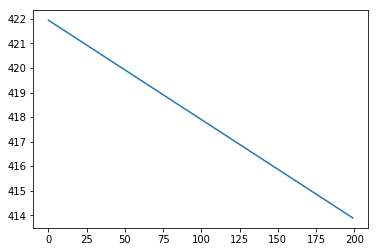

In [152]:
plt.plot(list(range(iteration_num)), losses)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)